# Neuroscape playground

In [1]:
# imports
from multiprocessing import Pool
import jax
from jax import random, grad, jit, vmap, lax
import jax.numpy as jnp
import src
import importlib
from matplotlib import pyplot as plt
# black background

In [2]:
importlib.reload(src);
plt.style.use('dark_background')
plt.rcParams['font.family'] = 'Times New Roman'

In [3]:
n_steps = 200
batch_size = 32
n_samples = 2000

In [4]:
reload_data = True  # flip to false after first run
args_list = ['--subject', 'subj05', '--batch_size', str(batch_size), '--n', str(n_samples), '--n_steps', str(n_steps)]
conf, args = src.get_config(), src.get_args(args_list)
if reload_data:
    train_loader, val_loader, _ = src.get_loaders(conf, args)
    next(train_loader), next(val_loader);

100%|██████████| 1575/1575 [00:44<00:00, 35.59it/s]


In [5]:
cnn_layer_sizes = [(3, 4, 3), (4, 8, 3)]
mlp_layer_sizes = [8192, 256, 256, 80]
conf['layer_sizes'] = {'cnn': cnn_layer_sizes, 'mlp': mlp_layer_sizes}
rng = jax.random.PRNGKey(0)
params = src.init_params(conf['layer_sizes'], rng)
metrics = {'train_acc': [], 'val_acc': [], 'train_loss': [], 'val_loss': [] }

train loss: 0.1343, train acc: 0.9663, val loss: 0.1246, val acc: 0.9694: 100%|██████████| 200/200 [00:54<00:00,  3.69it/s]


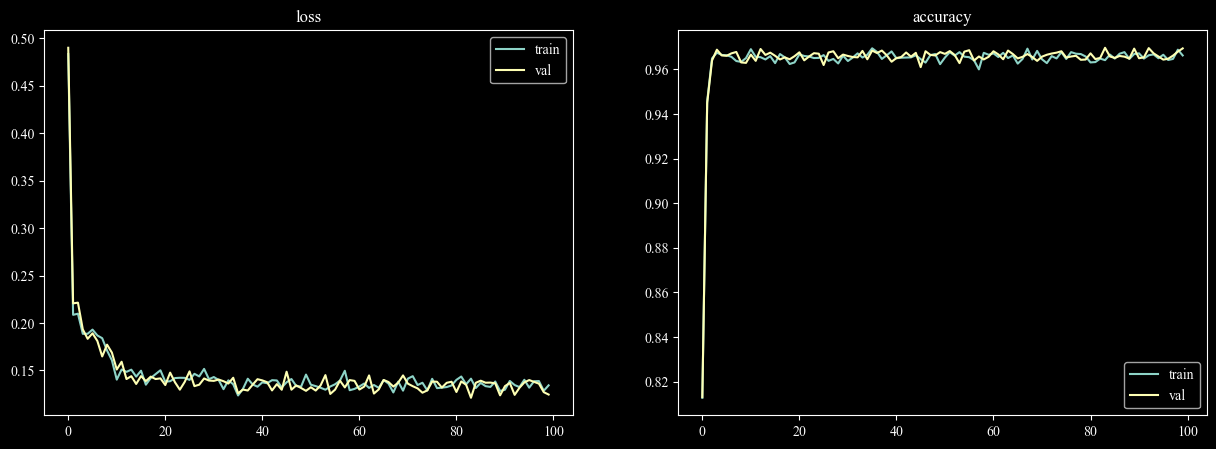

In [6]:

params, metrics = src.train(params, metrics, conf, args, train_loader, val_loader)
src.plot_metrics(metrics);